In [1]:
# Dependencies
import matplotlib.pyplot as plt

%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
import os 
from generateXdata import generateX
from math import ceil
import warnings
# Load in csv

#raw_df = pd.read_csv("C:/Users/admin/Documents/SMU/Final Project/Data/recs2015.csv")
filepath = os.path.join("dataforfinalproject","RECS_COMBINED_DATA.csv")
raw_df=pd.read_csv(filepath)
colmns_file = os.path.join("dataforfinalproject","Final_Columns_withCat.csv")
cols_file=pd.read_csv(colmns_file)

In [2]:
# read the columns from Columns csv
df_cols = pd.read_csv(colmns_file)
df_cols
# df_cols.columns

,COLUMN_NAME,COLUMN_CAT_ABBR,COLUMN_CATEGORY,COLUMN_DESCRIPTION,FEATURES_MODEL,COLUMN_TYPE,REQ_ONEHOTENC
0,RECSYEAR,COMMON,CommonVariables,Survey Conducted Year,N,Numerical,False
1,COUNTRY,COMMON,CommonVariables,String,N,String,False
2,DOEID,COMMON,CommonVariables,4-digit identification number,N,Numerical,False
3,REGIONC,COMMON,CommonVariables,Census Region,Y,Categorical,True
4,REGIONNAME,COMMON,CommonVariables,Region Name,N,Categorical,True
5,DIVISION,COMMON,CommonVariables,Census Division,Y,Categorical,True
6,DIVISIONNAME,COMMON,CommonVariables,Division names,N,Categorical,True
7,TYPEHUQ,COMMON,CommonVariables,Type of Home: as report by Respondent,N,Categorical,True
8,CELLAR,HUC,Housing Unit Characteristics,Home Has Basement,Y,Categorical,True
9,STORIES,HUC,Housing Unit Characteristics,Reported Stories in Housing Unit,Y,Numerical,False


In [3]:
raw_df.describe()


,RECSYEAR,DOEID,REGIONC,DIVISION,TYPEHUQ,CELLAR,STORIES,PRKGPLC1,YEARMADE,OCCUPYY,...,WDPELLET,WDOTHER,WDWARM,WDWATER,USESOLAR,SOLWATER,SOLOTHER,TVAUDIOEQUIP,PCOFFEQUIP,PHONE
count,21430.000000,21430.000000,21430.000000,21430.000000,21430.000000,21430.000000,21430.000000,21430.000000,21430.000000,21430.000000,...,21430.000000,21430.000000,21430.000000,21430.000000,21430.000000,21430.000000,21430.000000,21430.000000,21430.000000,21430.000000
mean,2008.789827,7205.857863,2.679888,5.453010,2.666636,0.126832,15.122912,0.468735,4.062529,6.808166,...,0.295194,-1.385768,0.112179,0.001260,0.009846,0.002427,0.006300,6.524078,2.665982,1.516472
std,4.803271,4406.168345,1.035783,2.806848,1.205252,2.300688,20.558255,2.286153,2.237875,2.003827,...,4.218022,0.927989,0.315594,0.035474,0.098740,0.049201,0.079121,3.612805,2.276647,1.118314
min,2001.000000,1.000000,1.000000,1.000000,1.000000,-2.000000,-2.000000,-2.000000,1.000000,1.000000,...,-2.000000,-2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2009.000000,3336.250000,2.000000,3.000000,2.000000,-2.000000,10.000000,0.000000,2.000000,6.000000,...,-2.000000,-2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,1.000000,1.000000
50%,2009.000000,6481.500000,3.000000,5.000000,2.000000,0.000000,10.000000,0.000000,4.000000,8.000000,...,-2.000000,-2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,3.000000,2.000000
75%,2015.000000,11072.750000,4.000000,8.000000,3.000000,1.000000,20.000000,1.000000,6.000000,8.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,4.000000,2.000000
max,2015.000000,15686.000000,4.000000,10.000000,5.000000,9.000000,99.000000,9.000000,13.000000,9.000000,...,9.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,33.000000,23.000000,10.000000


In [4]:
#from sklearn.preprocessing import StandardScaler
#features =raw_df[[']]

# Data Preparation


In [5]:
# Extract features and labels
labels = raw_df['TOTALDOLLAR']
#raw_df = features.drop('TYPEHUQ', axis = 1)

In [6]:
# List of features for later use

#model = df_cols[df_cols.FEATURES_MODEL == "Y"].COLUMN_NAME
#modelDF=model.drop(columns=['TOTALBTU'])

#feature=modelDF
#print(modelDF)
#features = list(features.columns)

In [7]:
# Gathering features and columns
features_X,columns_names = generateX(ohe = True, target = "DOLLAR")


 X Features shape : (21430, 87)
y label shape : (21430,)
cols with values as 99 and -2: ['CELLAR', 'STORIES', 'PRKGPLC1', 'BEDROOMS', 'FUELPOOL', 'SIZRFRI1', 'TYPERFR1', 'AGERFRI1', 'SIZRFRI2', 'TYPERFR2', 'AGERFRI2', 'NUMFREEZ', 'SIZFREEZ', 'AGEFRZR', 'STOVENFUEL', 'OVENUSE', 'AMTMICRO', 'DWASHUSE', 'WASHLOAD', 'WASHTEMP', 'EQUIPM', 'FUELHEAT', 'EQUIPAGE', 'PROTHERM', 'TEMPHOME', 'TEMPGONE', 'TEMPNITE', 'AGECENAC', 'USECENAC', 'NUMBERAC', 'WWACAGE', 'USEWWAC', 'FUELH2O', 'WHEATAGE', 'WHEATSIZ', 'LGTOUTNUM', 'ESDISHW', 'PGASHEAT', 'WOODAMT'] 

Duplicate Count : 0
shape of X is (21430, 79)


In [8]:
# Using Skicit-learn to split data into training and testing sets
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
train_features, test_features, train_labels, test_labels = train_test_split(features_X, labels, test_size = 0.2, random_state = 30)

In [9]:
print('Training Features Shape:', train_features.shape)
print('Training Labels Shape:', train_labels.shape)
print('Testing Features Shape:', test_features.shape)
print('Testing Labels Shape:', test_labels.shape)

Training Features Shape: (17144, 79)
Training Labels Shape: (17144,)
Testing Features Shape: (4286, 79)
Testing Labels Shape: (4286,)


In [10]:
# Import the model we are using
from sklearn.ensemble import RandomForestRegressor



C:\Users\admin\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [11]:
#Base model 
rf_base = RandomForestRegressor()
# Train the model on training data
rf_base.fit(train_features, train_labels);

from sklearn.metrics import mean_squared_error
predictions = rf_base.predict(test_features)
MSE = mean_squared_error(test_labels, predictions)
RMSE=np.sqrt(MSE)
r2 = rf_base.score(test_features, test_labels)
print(MSE)
print(RMSE)
print(r2)


110099.39381217243
331.8122870120581
0.8264408619819855


In [12]:
# Final Tuning(n_estimators)
# Instantiate model with n decision trees
rf = RandomForestRegressor(n_estimators =25, random_state = 30, max_depth = 11, max_features='auto')

# Train the model on training data
rf.fit(train_features, train_labels);
from sklearn.metrics import mean_squared_error
predictions = rf.predict(test_features)
MSE = mean_squared_error(test_labels, predictions)
RMSE=np.sqrt(MSE)
r2 = rf.score(test_features, test_labels)
print(MSE)
print(RMSE)
print(r2)


114259.20783954032
338.02249605542573
0.8198833895753991


In [15]:

# Train the model on test data
rf.fit(test_features, test_labels);
from sklearn.metrics import mean_squared_error
predictions = rf_base.predict(train_features)
Train_MSE = mean_squared_error(train_labels, predictions)
r2 = rf_base.score(train_features, train_labels)
RMSE=np.sqrt(MSE)
print(MSE)
print(RMSE)
print(r2)

114259.20783954032
338.02249605542573
0.9687370358991029


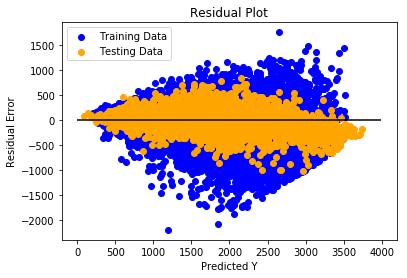

<Figure size 432x288 with 0 Axes>

In [23]:
plt.scatter(rf.predict(train_features), rf.predict(train_features) - train_labels, c="blue", label="Training Data")
plt.scatter(rf.predict(test_features), rf.predict(test_features) - test_labels, c="orange", label="Testing Data")
plt.xlabel("Predicted Y")
plt.ylabel("Residual Error")
plt.legend()
plt.hlines(y=0, xmin=test_labels.min(), xmax=test_labels.max())
plt.title("Residual Plot")
plt.show()
plt.savefig('C:/Users/admin/Desktop/Project3final/Pictures/RandomForestResidual.png')

In [ ]:
# Random Forests in sklearn will automatically calculate feature importance
importances = rf.feature_importances_
#importances

In [ ]:
# We can sort the features by their importance
df=pd.DataFrame(sorted(zip(rf.feature_importances_,columns_names), reverse=True))
print(df)

In [ ]:
data_plot =pd.DataFrame(raw_df[['BTUELOTH','WINDOWS', 'DIVISION','CUFEETNG','BTUFO','BTUEL','REGIONC','GALLONLP','BTUELCOL','HDD65','BTUELRFG',"CDD65",'TOTALDOLLAR']])


In [ ]:
fcols = 3
y_vars=['BTUELOTH','CUFEETNG','BTUFO','BTUEL','GALLONLP','BTUELCOL','HDD65','BTUELRFG',"CDD65"]
frows = ceil(len(y_vars)/fcols)
plt.figure(figsize=(20,4*frows))


for i,col in enumerate(y_vars):
    plt.subplot(frows,fcols,i+1)
    plt.scatter(data_plot[col],data_plot['TOTALDOLLAR'])
    #sns.violinplot(data_plot[col],data_plot['TOTALDOLLAR'])

#g.map(plt.scatter, alpha=0.5)
#plt.xlabel('TOTALDOLLAR', fontsize =18)
#plt.ylabel(['BTUELOTH','CUFEETNG','BTUFO','BTUEL','GALLONLP','BTUELCOL','HDD65','BTUELRFG',"CDD65"], fontsize=16)
plt.legend();
plt.savefig('C:/Users/admin/Desktop/Project3final/Pictures/RandomForestTotalDollar.png')